### Exercise 8.10
PH 295  
Nick Ball  
**Purpose:**
Write a program to solve two second order equations with both fixed and adaptive step sizes. Graph your results.

*Second-Order Eq's*
$$
\frac{d^2 x }{dt^2} = -GM\frac{x}{r^3}, \, \, \frac{d^2 y }{dt^2} = -GM\frac{y}{r^3}
$$
  
*Error Calculations:*
$$
\rho = \frac{30 h_{failed} \, \delta}{|x_1-x_2|}
$$
  
$$
h = h_{failed} \, \rho ^{\frac{1}{4}}
$$

In [68]:
#Import libraries
from numpy import sin, array, arange
from matplotlib import pyplot as plt

a) Turn the two above second-order equations into four first-order equations, using the methods you have learned.

-Since we know $\ddot{x} = \frac{dv_x}{dt}$ and $\ddot{y} = \frac{dv_y}{dt}$, we now have:
$$
\frac{dv_x}{dt} = -GM\frac{x}{r^3}, \, \, \, \frac{dv_y}{dt} = -GM\frac{y}{r^3}
$$

b) Write a program to solve your equations using the fourth order Runge-Kutta method with a fixed step size.

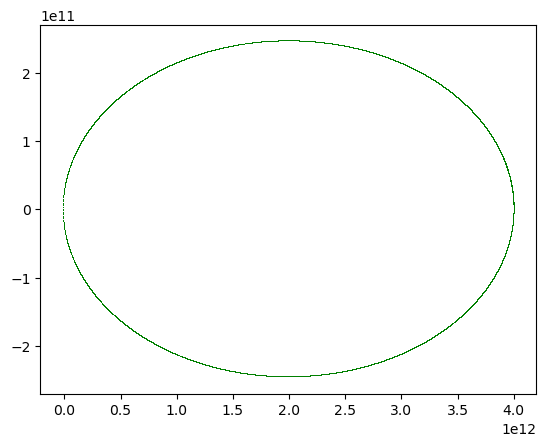

In [69]:
#Define two simultanios ODE's as one function of values r(x,y) and t
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx                 #dx/dt
    fy = vy                 #dy/dt
    R = (x**2 + y**2)**0.5
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    return array([fx,fy,fvx,fvy], float)

#Define Constants
G = 6.67e-11
M = 1.989e30
a = 0.0
b = 1.7e9
N = 100000
h = (b-a)/N

tpoints = arange(a,b,h)  
xpoints = []
ypoints = []

#Initial conditions array
r = array([4e12,0.0,0.0,500],float)
t = 0

#RK4 Loop
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    
    #actual RK4 here is here
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    
    #add estimated change to r
    r += (k1+2*k2+2*k3+k4)/6
    
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints,'g,')
plt.show()

c) Modify the program to now use an adaptive step size.

In [74]:
#Define two simultanios ODE's as one function of values r(x,y) and t
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx                 #dx/dt
    fy = vy                 #dy/dt
    R = (x**2 + y**2)**0.5
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    return array([fx,fy,fvx,fvy], float)

#Define Runge Kutte 4 
def RK4(r,h,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return r + (k1+2*k2+2*k3+k4)/6
    

#Define Constants
G = 6.67e-11       #Gravitational constant
M = 1.989e30       #Mass of sun in kg
tmax = 1.7e9    #maximum time (found through trial and error)
h = 3600000        #guess step
δ = 1e3/3.2e7      #related to error, 1km/yr  (i think)

#Set up lists for t, x, and y
tpoints = []  
xpoints = []
ypoints = []

#Initial conditions
r = array([4e12,0.0,0.0,500],float)
t = 0
tpoints.append(t)
xpoints.append(r[0])
ypoints.append(r[1])

#RK4 Loop
while t < tmax:
    
#First do two RK4 steps of size h
    #Calc a step h in the future starting at t,r
    ri = RK4(r,h,t)
    ti = t + h
    
    #Calc a step h in the future starting at ti,ri
    r1 = RK4(ri,h,ti)
    
    #next, do one RK4 step of size 2h
    r2 = RK4(r,2*h,t)
       
    #Accuracy
    ex = (r1[0]-r2[0])/30          #error in x
    ey = (r1[1]-r2[1])/30          #error in y
    etotal = (ex**2 + ey**2)**0.5  #total error
    
    ρ = min(30*h*δ/etotal,16)      #min keeps the h from more than doubling each success
    
    if ρ > 1:                      #success
        t += 2*h
        h = h*ρ**0.25              #updates h with newleyfound target h
        r = r1 #+ (r1-r2)/15       #set r to new value
        tpoints.append(t)
        xpoints.append(r[0])
        ypoints.append(r[1])
    else:                          #failed step, do over
        h = h*ρ**0.25 

d) Modify your program to place dots on the graph showing the positions of the comet at each Runge Kutta step around a single orbit.

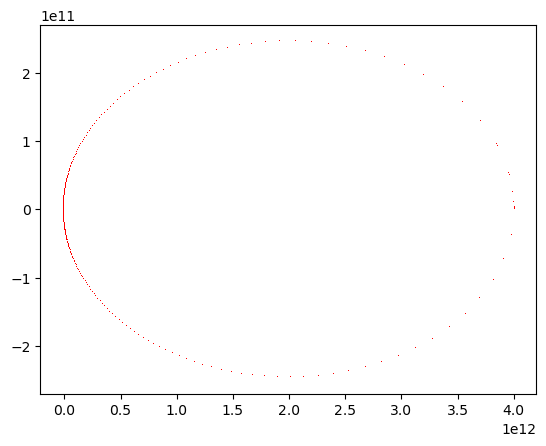

In [81]:
#Plot the figure
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints,'r,')
plt.show()

C:\Users\slick\AppData\Local\Temp\ipykernel_9140\1292051407.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  ρ = min(30*h*δ/etotal,16)  #min keeps the h from more than doubling each success


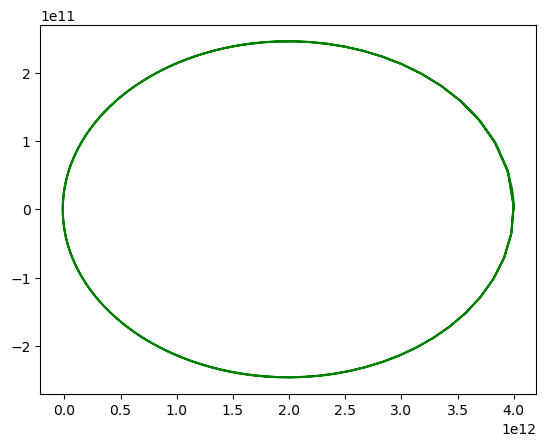

In [82]:
########################################################
# In class program, very unorganized, but still works. #
# Refined version above. Use as ref if needed.         #
########################################################


#Define two simultanios ODE's as one function of values r(x,y) and t
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx                 #dx/dt
    fy = vy                 #dy/dt
    R = (x**2 + y**2)**0.5
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    return array([fx,fy,fvx,fvy], float)

def RK4(h,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    

#Define Constants
G = 6.67e-11
M = 1.989e30
tmax = 2*1.7e9
h = 3600
δ = 1e3/3.2e7

tpoints = []  
xpoints = []
ypoints = []

#Initial conditions array
r = array([4e12,0.0,0.0,500],float)
t = 0
tpoints.append(t)
xpoints.append(r[0])
ypoints.append(r[1])

#RK4 Loop
while t < tmax:
    
    #first do two RK4 steps of size h
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    
    #intermediate value
    ri = r + (k1+2*k2+2*k3+k4)/6
    ti = t + h
    
    k1 = h*f(ri,ti)
    k2 = h*f(ri+0.5*k1,ti+0.5*h)
    k3 = h*f(ri+0.5*k2,ti+0.5*h)
    k4 = h*f(ri+k3,ti+h)    
    
    #Calculating whether h is too large or too small
    
    #Calculate a step
    r1 = ri + (k1+2*k2+2*k3+k4)/6
    
    #next, do one RK4 step of size 2h
    k1 = 2*h*f(r,t)
    k2 = 2*h*f(r+0.5*k1,t+h)
    k3 = 2*h*f(r+0.5*k2,t+h)
    k4 = 2*h*f(r+k3,t+2*h)
    
    r2 = r + (k1+2*k2+2*k3+k4)/6
    
    
    #Accuracy
    ex = (r1[0]-r2[0])/30
    ey = (r1[1]-r2[1])/30
    etotal = (ex**2 + ey**2)**0.5
    
    ρ = min(30*h*δ/etotal,16)  #min keeps the h from more than doubling each success
    
    if ρ > 1:     #success
        t += 2*h
        h = h*ρ**0.25      #updates h with newleyfound target h
        r = r1
        tpoints.append(t)
        xpoints.append(r[0])
        ypoints.append(r[1])
    else:                 #failed step, do over
        h = h*ρ**0.25 
    
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints,'g-')

**Conclusion**
No idea how this entriely works, but I see that it does work. Felt like streamlining the process using the built in function for RC4 so as to hopefully simplify code. Need to find out how to optimize other code more, gain more python skills, and lastly how to finish a conclusi